In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Rice_Citation_Request.txt
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (11154).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8058).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (5150).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8267).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8747).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (2970).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (10959).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (4976).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (730).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (9279).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (534).jpg
/kaggle/i

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchvision import transforms, utils, datasets, models
from torch.autograd import Variable
from keras.optimizers import Adam
import glob
import os
import numpy as np 
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime   
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import pathlib

In [44]:
path = pathlib.Path("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")

In [45]:
arborio = list(path.glob('Arborio/*'))
basmati = list(path.glob('Basmati/*'))
ipsala = list(path.glob('Ipsala/*'))
jasmine = list(path.glob('Jasmine/*'))
karacadag = list(path.glob('Karacadag/*'))

total_list=arborio + basmati + ipsala + jasmine + karacadag

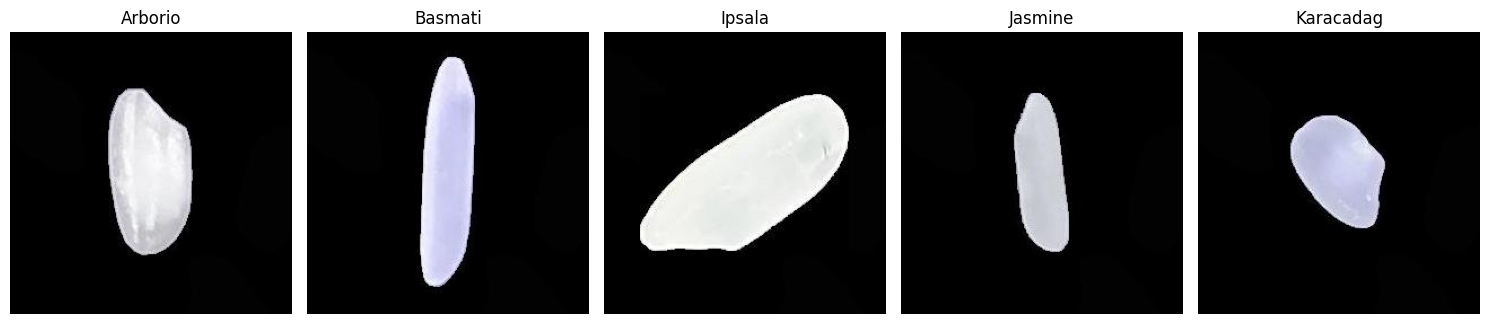

In [46]:
arborio_img = Image.open(random.choice(arborio))
basmati_img = Image.open(random.choice(basmati))
ipsala_img = Image.open(random.choice(ipsala))
jasmine_img = Image.open(random.choice(jasmine))
karacadag_img = Image.open(random.choice(karacadag))


fig, axes = plt.subplots(1, 5, figsize=(15, 5))


axes[0].imshow(arborio_img)
axes[0].set_title("Arborio")
axes[0].axis("off")

axes[1].imshow(basmati_img)
axes[1].set_title("Basmati")
axes[1].axis("off")

axes[2].imshow(ipsala_img)
axes[2].set_title("Ipsala")
axes[2].axis("off")

axes[3].imshow(jasmine_img)
axes[3].set_title("Jasmine")
axes[3].axis("off")

axes[4].imshow(karacadag_img)
axes[4].set_title("Karacadag")
axes[4].axis("off")

plt.tight_layout()
plt.show()

In [47]:
data_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor()
    ]
)

model_dataset = datasets.ImageFolder(path, transform=data_transform) 

image, label = model_dataset[0]
print(f"Image Size: {image.shape}")
print(f"Label: {label}")
print(image)

Image Size: torch.Size([3, 250, 250])
Label: 0
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [48]:
data_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((100,100)),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomVerticalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]
        ),
    ]
)
BATCH_SIZE=32

model_dataset = datasets.ImageFolder(path, transform=data_transform) 
train_count = int(0.7 * len(total_list)) 
valid_count = int(0.2 * len(total_list))
test_count = len(total_list) - train_count - valid_count
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(model_dataset, (train_count, valid_count, test_count))
train_dataset_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  
valid_dataset_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True) 
test_dataset_loader  = DataLoader(test_dataset , batch_size=BATCH_SIZE, shuffle=False)
dataloaders = {'train': train_dataset_loader, 'val': valid_dataset_loader, 'test': test_dataset_loader}

In [49]:
rice_types = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
rice_to_num = {rice_type: i for i, rice_type in enumerate(rice_types)}

In [50]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


# Building model

In [51]:
class CustomizedConvNet(nn.Module):
    def __init__(self,number_of_classes):
        super().__init__() #Inheritance
        
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=12,padding=1,kernel_size=3)
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=12,out_channels=20,padding=1,kernel_size=3)
        self.bn2=nn.BatchNorm2d(num_features=20)
        self.relu2=nn.ReLU()
        
        self.conv3 = nn.Conv2d(in_channels=20,out_channels=32,padding=1,kernel_size=3)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        

        self.fc1=nn.Linear(32*25*25, 5)

    
    def forward(self, Input):
        
        output=self.conv1(Input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool1(output)
        
        output=self.conv2(output)
        output=self.bn2(output)
        output=self.relu2(output)
        
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=self.pool3(output)
    
        
        output = torch.flatten(output, 1)
        output = output.view(-1,32*25*25)
        output=self.fc1(output)

        
        return output

In [52]:
model = CustomizedConvNet(5)
model = model.to(device)
model

CustomizedConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=20000, out_features=5, bias=True)
)

In [53]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [54]:
import time
import torch

def train(model, train_loader, val_loader, device, loss_fn, optimizer, epochs):

  print(" Let the training games begin! ")
  model.to(device)

  train_history = {
      'train_loss': [],
      'train_acc': [],
      'val_loss': [],
      'val_acc': [],
  }

  for epoch in range(1, epochs + 1):
    print(f"\n Epoch {epoch}/{epochs} — Time to hustle! ")
    model.train()

    epoch_start = time.time()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    # Training loop
    for batch_idx, (inputs, labels) in enumerate(train_loader):
      optimizer.zero_grad()
      inputs, labels = inputs.to(device), labels.to(device)

      # Forward pass
      outputs = model(inputs)
      loss = loss_fn(outputs, labels)

      # Backpropagation
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      _, preds = torch.max(outputs, 1)
      correct_preds += (preds == labels).sum().item()
      total_preds += labels.size(0)

      if batch_idx % 250 == 0:  # Add a checkpoint every 10 batches
        print(f" Batch {batch_idx}: Running Loss: {loss.item():.4f}")

    avg_train_loss = running_loss / len(train_loader)
    train_acc = correct_preds / total_preds * 100

    print(f"✅ Epoch {epoch} Complete! Avg Loss: {avg_train_loss:.4f}, Accuracy: {train_acc:.2f}%")

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0

    with torch.no_grad():
      for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        val_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_preds += (preds == labels).sum().item()
        total_preds += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct_preds / total_preds * 100

    print(f" Validation — Loss: {avg_val_loss:.4f}, Accuracy: {val_acc:.2f}%")
    print(f"⏰ Epoch time: {time.time() - epoch_start:.2f} seconds")

    # Update training history
    train_history['train_loss'].append(avg_train_loss)
    train_history['train_acc'].append(train_acc)
    train_history['val_loss'].append(avg_val_loss)
    train_history['val_acc'].append(val_acc)

  print("\n Training Complete! Go forth and conquer! ")
  return train_history

In [55]:
train_history = train(model, dataloaders['train'], 
                                   dataloaders['val'], device, loss_fn, optimizer, 5)

 Let the training games begin! 

 Epoch 1/5 — Time to hustle! 
 Batch 0: Running Loss: 1.8479
 Batch 250: Running Loss: 0.0231
 Batch 500: Running Loss: 0.0355
 Batch 750: Running Loss: 0.0148
 Batch 1000: Running Loss: 0.0276
 Batch 1250: Running Loss: 0.0061
 Batch 1500: Running Loss: 0.0179
✅ Epoch 1 Complete! Avg Loss: 0.0688, Accuracy: 98.05%
 Validation — Loss: 0.0301, Accuracy: 99.11%
⏰ Epoch time: 205.52 seconds

 Epoch 2/5 — Time to hustle! 
 Batch 0: Running Loss: 0.0031
 Batch 250: Running Loss: 0.0115
 Batch 500: Running Loss: 0.0146
 Batch 750: Running Loss: 0.0071
 Batch 1000: Running Loss: 0.0026
 Batch 1250: Running Loss: 0.0334
 Batch 1500: Running Loss: 0.0239
✅ Epoch 2 Complete! Avg Loss: 0.0270, Accuracy: 99.12%
 Validation — Loss: 0.0191, Accuracy: 99.43%
⏰ Epoch time: 144.24 seconds

 Epoch 3/5 — Time to hustle! 
 Batch 0: Running Loss: 0.0063
 Batch 250: Running Loss: 0.0272
 Batch 500: Running Loss: 0.0090
 Batch 750: Running Loss: 0.0065
 Batch 1000: Running Lo

In [56]:
def plot_comparision_result(train_history):
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot train and validation accuracy
    axs[0].plot(train_history['train_acc'], color="red", marker="o")
    axs[0].plot(train_history['val_acc'], color="blue", marker="h")
    axs[0].set_title('Accuracy Comparison between Train & Validation Set')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc="lower right")
    
    # Plot train and validation loss
    axs[1].plot(train_history['train_loss'], color="red", marker="o")
    axs[1].plot(train_history['val_loss'], color="blue", marker="h")
    axs[1].set_title('Loss Comparison between Train & Validation Set')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc="upper right")

    plt.tight_layout()
    plt.show()

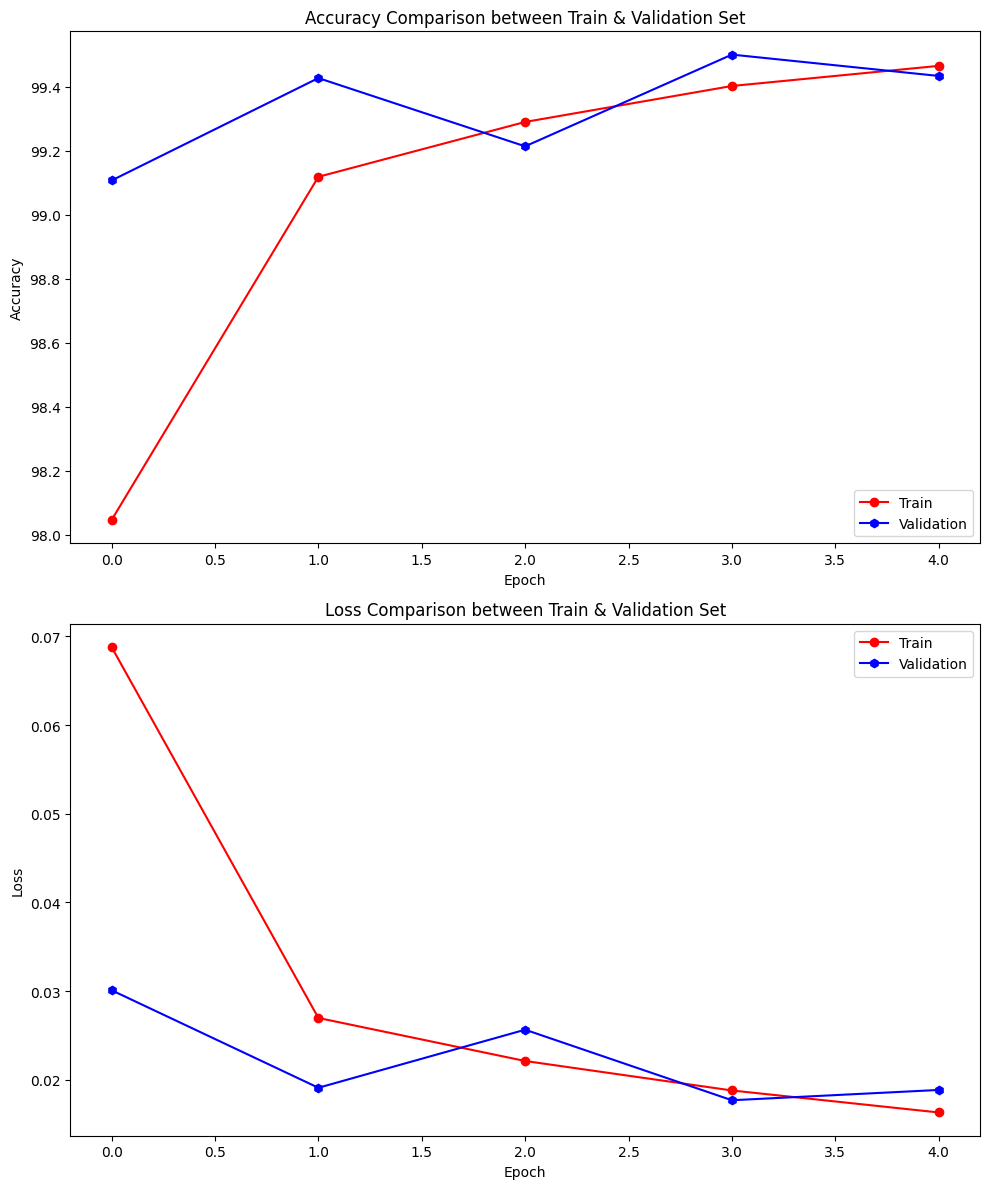

In [57]:
plot_comparision_result(train_history)

In [58]:
def get_ture_and_pred_labels(dataloader, model):
    i = 0
    y_true = []
    y_pred = []
    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.numpy()
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)
        pred = pred.detach().cpu().numpy()
        
        y_true = np.append(y_true, labels)
        y_pred = np.append(y_pred, pred)
    
    return y_true, y_pred

In [60]:
y_true, y_pred = get_ture_and_pred_labels(dataloaders['test'], model)

In [110]:
def plot_confusion_matrix(y_test, y_pred, labels):

    cm = confusion_matrix(y_test, y_pred)
    
    
    # Calculate percentages
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels1 = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels1 = np.asarray(labels1).reshape(5, 5)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels1, fmt='', cmap='Blues', cbar=False, 
                annot_kws={"size": 16}, xticklabels=labels, yticklabels=labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

In [108]:
print(classification_report(y_true, y_pred), '\n\n')

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1476
         1.0       1.00      0.99      1.00      1482
         2.0       1.00      1.00      1.00      1519
         3.0       0.99      1.00      0.99      1529
         4.0       0.99      1.00      0.99      1494

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500
 




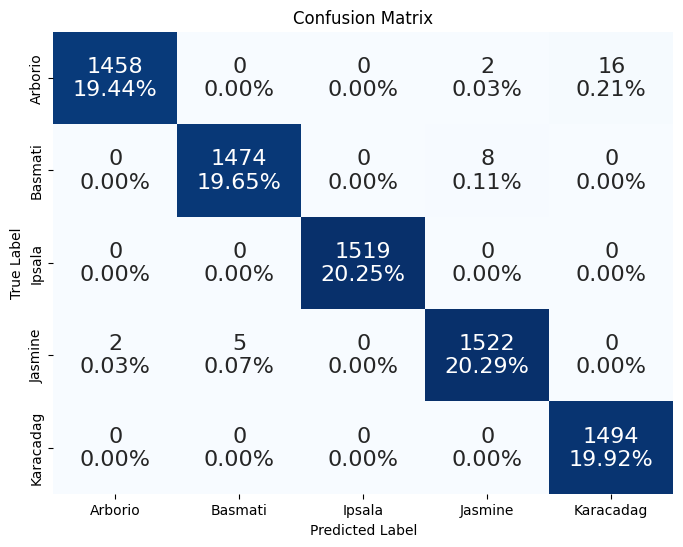

In [111]:
plot_confusion_matrix(y_true, y_pred, model_dataset.classes)